In [1]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem import *

(500.0, 1300.0)

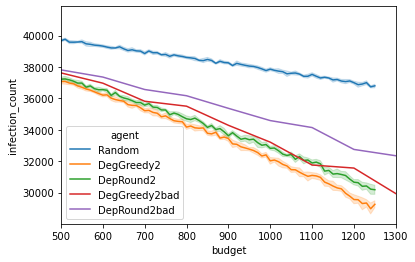

In [13]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_bHVud" / "results.csv")
df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_aZwFe"/"results.csv")])

df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_m9YmW"/"results.csv")])

sns.lineplot(data=df, x="budget", y="infection_count",hue="agent")
plt.xlim(500,1300)

<AxesSubplot:xlabel='snitch_rate', ylabel='infection_count'>

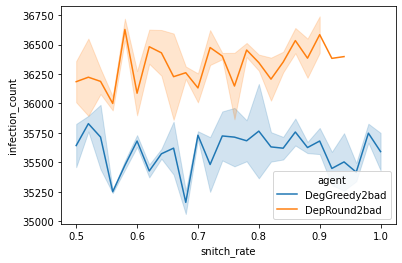

In [11]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_38EqV" / "results.csv")

sns.lineplot(data=df, x="snitch_rate", y="infection_count", hue="agent")

In [2]:
np.mean([1,2,3,4])

2.5

In [9]:
def readData():
    G = nx.Graph()
    G.__name__ = "cville"
    nodes = {}
    rev_nodes = []
    cnode_to_labels = {}

    file = open(PROJECT_ROOT / "data/raw/portland/portland.csv", "r")
    file.readline()
    lines = file.readlines()
    c = 0
    c_node=0
    #ma = 0
    #mi = 100000000
    
    labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
    labels_df = labels_df[["pid", "hid"]]
    labels_dict = {}
    for index, ids in labels_df.iterrows():
        labels_dict[ids["pid"].item()] = ids["hid"].item()
    
    for line in lines:

        a = line.split(",")
        u = int(a[0])
        v = int(a[1])

        if u in nodes.keys():
            u = nodes[u]
        else:
            nodes[u] = c_node
            rev_nodes.append(u)
            #cnode_to_labels[c_node] = labels_dict[u];
            u = c_node
            c_node+=1        

        if v in nodes.keys():
            v = nodes[v]
        else:
            nodes[v] = c_node
            rev_nodes.append(v)
            #cnode_to_labels[c_node] = labels_dict[v];
            v = c_node
            c_node+=1

        G.add_edge(u,v)
    
    #nx.set_node_attributes(G, cnode_to_labels, 'hid')
    
    return G

In [10]:
G = readData()

In [11]:
len(G.nodes)

1409196

In [12]:
len(G.edges)

8307766

In [21]:
sorted(G.degree, key=lambda x: x[1], reverse=True)


[(44998, 67),
 (440794, 67),
 (37994, 63),
 (374540, 62),
 (171816, 61),
 (188505, 61),
 (828919, 61),
 (67636, 60),
 (161430, 60),
 (388657, 60),
 (1073776, 60),
 (44860, 59),
 (66044, 59),
 (174004, 59),
 (389379, 59),
 (456391, 59),
 (848796, 59),
 (9250, 58),
 (44853, 58),
 (120781, 58),
 (120782, 58),
 (299017, 58),
 (438082, 58),
 (456427, 58),
 (568836, 58),
 (63738, 57),
 (161432, 57),
 (261506, 57),
 (336865, 57),
 (366788, 57),
 (460243, 57),
 (711738, 57),
 (822135, 57),
 (7089, 56),
 (72595, 56),
 (106337, 56),
 (133328, 56),
 (161410, 56),
 (166119, 56),
 (177808, 56),
 (193684, 56),
 (240191, 56),
 (268946, 56),
 (334280, 56),
 (354707, 56),
 (423138, 56),
 (432505, 56),
 (450383, 56),
 (455602, 56),
 (455903, 56),
 (525566, 56),
 (530578, 56),
 (773876, 56),
 (849991, 56),
 (1407374, 56),
 (163168, 55),
 (285190, 55),
 (298852, 55),
 (320678, 55),
 (335472, 55),
 (374542, 55),
 (410398, 55),
 (451057, 55),
 (458047, 55),
 (461137, 55),
 (521187, 55),
 (532448, 55),
 (571

In [20]:
a = 0
for (u,v) in G.degree:
    if v >= a:
        a = v
print(a)

67


In [43]:
G = load_graph("montgomery")

In [38]:
G = readData()

In [28]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)

In [44]:
S = []
I = [] 
R = []

for i in range(len(G.nodes)):
    if random.random() < .0001:
        I.append(i)
    else:
        S.append(i)
        
print(len(I))

8


In [ ]:
state = InfectionState(G, (S,I,[],R), 1000, .05,1,1,1,1)
agent = DegGreedy
t = -1
while (len(state.SIR.I2) != 0) | (len(state.SIR.I1) != 0):
    print(t, len(state.SIR.R))
    t+=1
    #to_quarantine = agent(state,num_samples=i)
    state.step([])


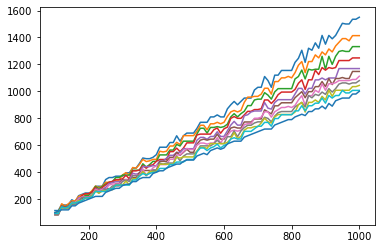

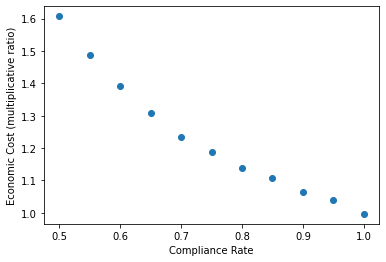

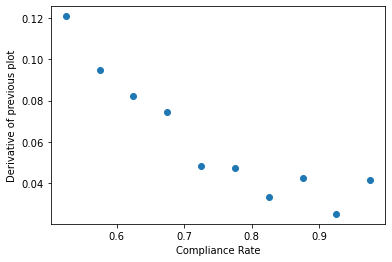

In [22]:
#montgomery, t7.json
economic_plot("run_B9PKb")

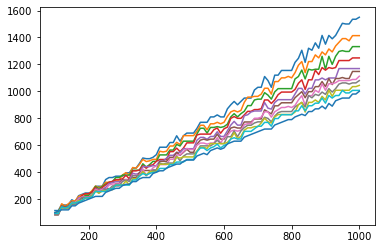

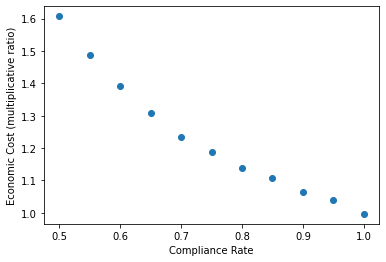

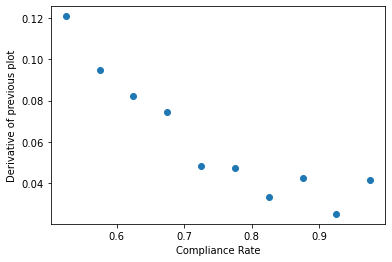

In [23]:
#montgomery, t8.json
economic_plot("run_HHunU")

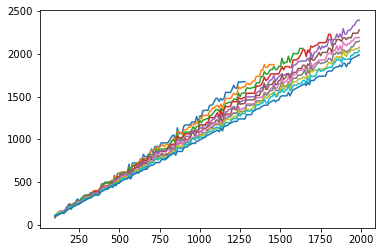

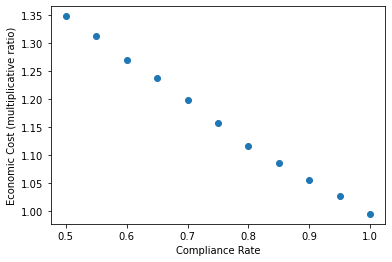

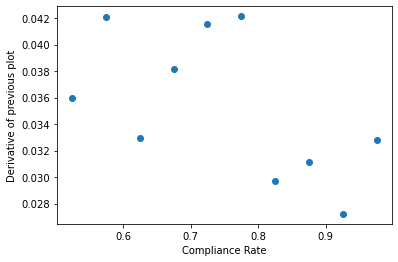

In [10]:
#charlottesville, a5.json
economic_plot("run_HqNSh", 2000)

In [ ]:
#charlottesville, a6.json
economic_plot("run_hArmg")

In [9]:
def economic_plot(folder: str, maximum:int = 1000):
    df = pd.read_csv("../output/" + folder + "/results.csv")
    df = df.sort_values(by='compliance_rate')
    df1 = df[df.compliance_rate==1]

    x=[]
    y=[[] for _ in df.compliance_rate.unique()]
    df_arr = [df[df.compliance_rate==i].reset_index(drop=True) for i in df.compliance_rate.unique()]

    for B in range(100,maximum,10):

        val = df1[df1.budget==B]['infected_count_real'].mean()
        x.append(B)

        for i,rate in enumerate(df.compliance_rate.unique()):

            budgets = df_arr[i].budget.unique()
            budgets.sort()

            for b in budgets:

                if df_arr[i][df_arr[i].budget==b]['infected_count_real'].mean() <= val:
                    y[i].append(b*rate)
                    break
                    
    m=[]
    n=[]

    for i,yi in enumerate(y):    
        a,b = np.polyfit(x=x[:len(yi)],y=yi,deg=1)
        m.append(df.compliance_rate.unique()[i])
        n.append(a)
        sns.lineplot(x=x[:len(yi)],y=yi)
    plt.show()
    
    plt.scatter(x=m,y=n)    
    plt.xlabel("Compliance Rate")
    plt.ylabel("Economic Cost (multiplicative ratio)")
    plt.show()
    
    n_prime=[]
    m_prime=[]

    for (i,v) in enumerate(n):
        if(i!=0):
            n_prime.append(n[i-1]-n[i])
            m_prime.append(.5*m[i]+.5*m[i-1])
            
    plt.scatter(x=m_prime,y=n_prime)    
    plt.xlabel("Compliance Rate")
    plt.ylabel("Derivative of previous plot")
    plt.show()

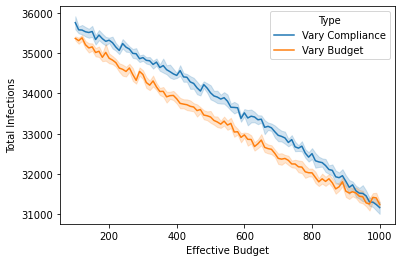

In [17]:
df = pd.read_csv("../output/run_bh8Gt/results.csv")
df1 = pd.read_csv("../output/run_5GQVw/results.csv")
df['Type'] = 'Vary Compliance'
df1['Type'] = 'Vary Budget'

df = pd.concat([df,df1])

df['effective_budget'] = df['compliance_rate'] * df['budget']

sns.lineplot(data=df, x='effective_budget',y='infected_count_known',hue='Type')
plt.ylabel("Total Infections")
plt.xlabel("Effective Budget")
plt.show()

In [3]:
G = load_graph("montgomery")

In [4]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)

In [ ]:
#this is how the code is used
for i in [10,100,1000,2000,5000,10000]:
    a = time.time()
    state = SimulationState(G, (S,I,R), (S,I,R), 1000, .078,1,1,1,1)
    agent = SAA_Diffusion

    while len(state.SIR_known.SIR[1]) != 0:
        #print(len(state.SIR_known.SIR[1]))
        to_quarantine = agent(state,num_samples=i)
        state.step(to_quarantine)

        #print(state.SIR_known.V1 == state.SIR_real.V1)
        #print("S :" + str(len(state.SIR_known.SIR.S)) + " " + str(len(state.SIR_real.SIR.S)))
        #print("I :" + str(len(state.SIR_known.SIR.I)) + " " + str(len(state.SIR_real.SIR.I)))
        #print("R :" + str(len(state.SIR_known.SIR.R)) + " " + str(len(state.SIR_real.SIR.R)))

        #print()

        #print(len(set(state.SIR_known.SIR.R).difference(set(state.SIR_real.SIR.R))))
        #print(len(set(state.SIR_real.SIR.R).difference(set(state.SIR_known.SIR.R))))
    print(time.time()-a)
    #print(len(state.SIR_known.SIR[1]))
    #print()
    print(len(state.SIR_known.SIR[2])/75457)
    #print(len(state.SIR_known.SIR[0]),len(state.SIR_real.SIR[0]))

In [2]:
print([i/100 for i in range(50,101,5)])

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [ ]:
problem = MinExposedSAADiffusion(state.SIR_known)

In [28]:
len(state.SIR_real.SIR[0] + state.SIR_real.SIR[1] + state.SIR_real.SIR[2])

75457

In [179]:
agents = [NoIntervention, Random, Degree, DepRound, DegGreedy]

In [180]:
for agent in agents:
    state = SimulationState(G, (S,I,R), (S,I,R), 2000, .078,1,1, 1,1)

    while len(state.SIR_known.SIR[1]) != 0:
        to_quarantine = agent(state)
        state.step(to_quarantine)

    print(agent.__name__ + " " + str(len(state.SIR_known.SIR[2])))


NoIntervention 36169
Random 30674
Degree 24299
DegGreedy 21525
DepRound 23785
